## Programming for Analytics -- Homework Assignment 2
## "Taylor on the Billboard"

#### Name: Yufeng Huang
#### Email: yufeng.huang@simon.rochester.edu
#### Date: 8/9/2024


## 0. General Objective
In this assignment, you will work with multiple CSV files containing Billboard 200 data from 2006 to 2020. Your goal is to load, clean, and concatenate the data into a single Pandas DataFrame. In this process, you will also focus on specific columns instead of keeping all columns. Additionally, you will format the date column, generate new variables, and perform specific analyses related to Taylor Swift. Good luck and have fun!

To begin, download the zip file containing all the data files. In the folder where this notebook sits, extract the zip file directly to this folder, so that all csv files are in the folder `py-billboard200`. For example, on my computer, this notebook is under `6_2_assignment_2/assignment_2.ipynb`. Then all my data csv files are under `6_2_assignment_2/py-billboard200/`.

## 1. Initial Data Construction

1a. You are provided with multiple CSV files, each corresponding to a year between 2008 and 2020. The files are named in the format `billboard-200-YEAR.csv` where `YEAR` refers to 1967 to 2020. Create a Pandas DataFrame, `billboard_ranking`, For each file from year 2006 to year 2020:
- Load the file into a Pandas DataFrame.
- Retain only the following columns: `date`, `title`, `artist`, and `current`. Rename `current` into `ranking` because it is the current week's ranking for that artist.
- Concatenate this data frame to the data frame `billboard_ranking`. 

In the process of reading files, some files might have some mis-recorded rows that are difficult to read. Skip these lines by using parameter `on_bad_lines="skip"` or `on_bad_lines="warn"`.


In [30]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Write your code here. Feel free to use more cells.
billboard_ranking = pd.DataFrame()
for yr in range(2006, 2021):
    temp_data = pd.read_csv(f"./py-billboard200/billboard-200-{yr}.csv", on_bad_lines="warn")   # "warn" if bad lines, so we know how many but for now won't do anything
    temp_data = temp_data[["date", "title", "artist", "current"]]   # keep columns
    temp_data.rename(columns={'current': 'ranking'}, inplace=True)
    billboard_ranking = pd.concat((billboard_ranking, temp_data), axis=0)

C:\Users\yfhua\AppData\Local\Temp\ipykernel_17696\14272744.py:4: ParserWarning: Skipping line 1511: expected 8 fields, saw 9

  temp_data = pd.read_csv(f"./py-billboard200/billboard-200-{yr}.csv", on_bad_lines="warn")   # "warn" if bad lines, so we know how many but for now won't do anything
C:\Users\yfhua\AppData\Local\Temp\ipykernel_17696\14272744.py:4: ParserWarning: Skipping line 3387: expected 8 fields, saw 9
Skipping line 3490: expected 8 fields, saw 9
Skipping line 3624: expected 8 fields, saw 9

  temp_data = pd.read_csv(f"./py-billboard200/billboard-200-{yr}.csv", on_bad_lines="warn")   # "warn" if bad lines, so we know how many but for now won't do anything
C:\Users\yfhua\AppData\Local\Temp\ipykernel_17696\14272744.py:4: ParserWarning: Skipping line 21: expected 8 fields, saw 9
Skipping line 206: expected 8 fields, saw 9
Skipping line 6788: expected 8 fields, saw 9
Skipping line 6822: expected 8 fields, saw 10

  temp_data = pd.read_csv(f"./py-billboard200/billboard-200-{yr}.

1b. Print the first few rows of this data. 

In [32]:
billboard_ranking.head()

,date,title,artist,ranking
0,2006-12-30,The Inspiration,Young Jeezy,1
1,2006-12-30,Taylor Hicks,Taylor Hicks,2
2,2006-12-30,Hannah Montana,Soundtrack,3
3,2006-12-30,NOW 23,Various Artists,4
4,2006-12-30,Awake,Josh Groban,5


## 2. Date Conversion

In the data, `date` is a string. Convert it to a date variable. Then generate `year` and `month` as two new columns. Then use .describe to check if values are sensible. 

In [63]:
# Write your code here.
# convert date
billboard_ranking["date"] = pd.to_datetime(billboard_ranking["date"], format="%Y-%m-%d")
# generate year and month
billboard_ranking["year"] = billboard_ranking["date"].dt.year
billboard_ranking["month"] = billboard_ranking["date"].dt.month


In [79]:
billboard_ranking.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 156504 entries, 0 to 10395
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     156504 non-null  datetime64[ns]
 1   title    156504 non-null  object        
 2   artist   156504 non-null  object        
 3   ranking  156504 non-null  int64         
 4   year     156504 non-null  int32         
 5   month    156504 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 7.2+ MB


## 3. Taylor Swift

3a. Zoom in on the part of `billboard_ranking` data where the artist is "Taylor Swift." Create another data frame, `taylor_ranking` for this subset of data.

In [67]:
# Write your code here.
taylor_ranking = billboard_ranking[billboard_ranking["artist"] == "Taylor Swift"]

3b. Determine Taylor's Billboard ranking (`ranking`) for her best-ranked title on the following dates
- the week of November 11, 2006: This is not long after her first albumn, "Taylor Swift," was released.
- the best ranking in the entire 2016: This is about 10 years after the previous date.

How much has her rating improved between these two time periods? Present one percentage number.


In [75]:
# Taylor's ranking in November 11, 2006
rank_2006 = taylor_ranking.loc[taylor_ranking["date"] == "2006-11-11", "ranking"]
print(f"Taylor's best ranking on Nov 11, 2006 was {rank_2006.values}")

Taylor's best ranking on Nov 11, 2006 was [19]


In [73]:
# Taylor's best ranking in the entire 2016
rank_2016 = taylor_ranking.loc[taylor_ranking["year"] == 2016, "ranking"].min()
print(f"Taylor's best ranking on Nov 12, 2016 was {rank_2016}")

Taylor's best ranking on Nov 12, 2016 was 8


In [87]:
# Taylor's percentage improvement from Nov 2006 to 2016 was:
improvement = rank_2016 / rank_2006.values - 1
print(f"Taylor's rank improvement was {(abs(improvement)*100).round(2)}%")

Taylor's rank improvement was [57.89]%


3c. Plot the ranking (`ranking`) of Taylor's album (`title`) "Taylor Swift" over time using the df_taylor DataFrame. Determine on your own what the appropriate plot type to use. Ensure that the plot is clear, with data correctly sorted, and appropriate labels for the axes and a title that reflects the content of the plot. 


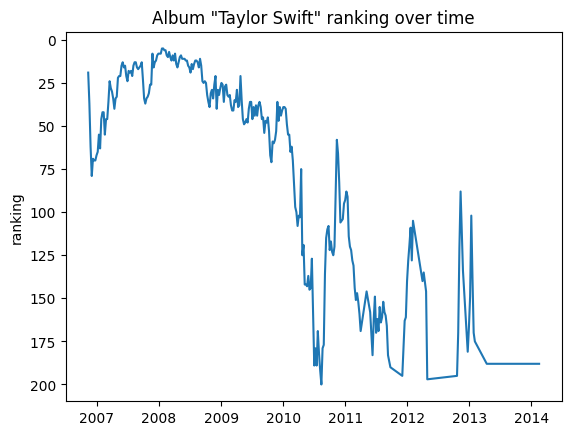

In [88]:
# Write your code here.
taylor_swift_album_ranking = taylor_ranking[taylor_ranking["title"] == "Taylor Swift"].sort_values("date")
plt.figure()
plt.plot(taylor_swift_album_ranking["date"], taylor_swift_album_ranking["ranking"])
plt.gca().invert_yaxis()            # Invert y-axis to have the highest ranking at the top
plt.ylabel("ranking")
plt.title('Album "Taylor Swift" ranking over time')
plt.show()